In [5]:
# load general modules
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
# import modules - classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


In [6]:
# 데이터 불러오기

data = pd.read_csv('.\p2p_data.csv')

In [7]:
data=data.drop(['verification_status','home_ownership','term'],axis=1)

In [8]:
#X변수와 Y변수 분리
#TARGET이 Y고 나머지가 X
y=data['TARGET'].values
X=data.drop('TARGET',axis=1)

In [9]:
#train data와 test data로 분할
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                 stratify=y,
                                                 test_size=0.2,
                                                 random_state=93456)

In [10]:
# Grid Search
rf = RandomForestClassifier(random_state=2019)

param_grid = {'n_estimators': [5, 10, 15, 20],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 2, 4, 6]}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2019),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6],
                         'n_estimators': [5, 10, 15, 20]})

In [11]:
print('Best parameters (Grid Search): \n',
      rf_cv.best_params_)

Best parameters (Grid Search): 
 {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 20}


In [12]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=20, random_state=2019)

In [13]:
y_pred = rf_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4335   44]
 [1319   59]]


In [14]:
acc = accuracy_score(y_test, y_pred)
print('[Accuracy]: {:.2f}%'.format(acc * 100))

[Accuracy]: 76.32%


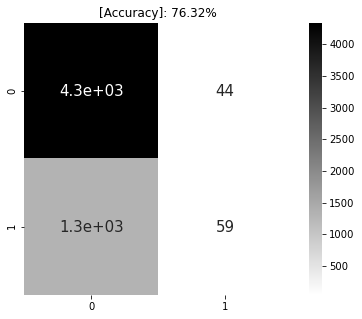

In [15]:
cm = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))

plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True, annot_kws={'size': 15},
            cmap='binary')
plt.title('[Accuracy]: {:.2f}%'.format(acc * 100))
plt.show()

In [16]:
# import modules - regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Grid Search
rf = RandomForestRegressor(random_state=2019)

param_grid = {'n_estimators': [5, 10, 15, 20],
              'max_depth': [None, 2, 4, 6]}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2019),
             param_grid={'max_depth': [None, 2, 4, 6],
                         'n_estimators': [5, 10, 15, 20]})

In [18]:
rf_cv.best_estimator_

RandomForestRegressor(max_depth=6, n_estimators=20, random_state=2019)

In [19]:
y_pred = rf_cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('[Mean Squared Error]: {:.2f}'.format(mse))
print('[R-Square          ]: {:.2f}%'.format(r2 * 100))

[Mean Squared Error]: 0.16
[R-Square          ]: 9.82%


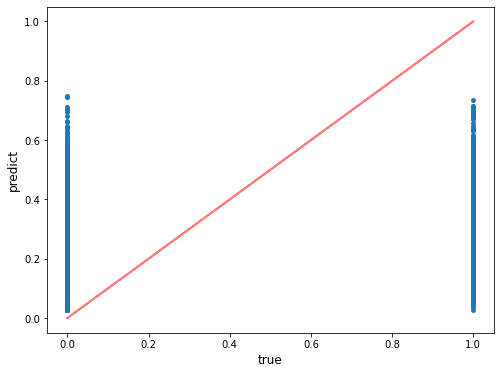

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=15)
plt.plot(y_test, y_test, alpha=0.5, lw=2, color='red')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.show()

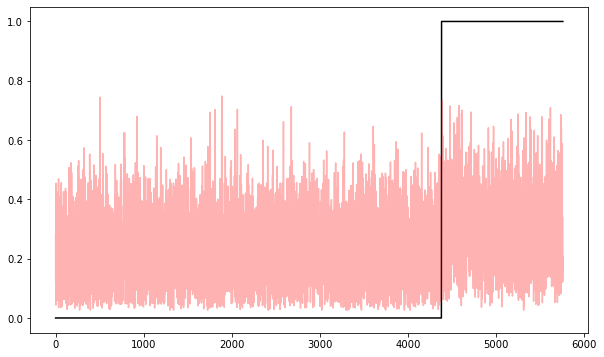

In [21]:
idx = y_test.argsort()

plt.figure(figsize=(10, 6))
plt.plot(y_test[idx], color='black', alpha=1.0)
plt.plot(y_pred[idx], color='red', alpha=0.3)
plt.show()